In [1]:
import pandas as pd
import pingouin as pg
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from scipy import stats
from bioinfokit.analys import stat

In [2]:
df_diabetes = pd.read_csv("diabetes (2).csv")

In [3]:
## data cleaning ##

In [4]:
df_diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
df_diabetes.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [6]:
zero_values = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
               'Insulin','BMI']

In [7]:
mean_values = df_diabetes[zero_values].mean()

In [8]:
df_diabetes[zero_values] = df_diabetes[zero_values].replace(0,mean_values)

In [9]:
df_diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0     6.000000    148.0           72.0      35.000000   79.799479  33.6   
1     1.000000     85.0           66.0      29.000000   79.799479  26.6   
2     8.000000    183.0           64.0      20.536458   79.799479  23.3   
3     1.000000     89.0           66.0      23.000000   94.000000  28.1   
4     3.845052    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [10]:
df_diabetes.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      4.400782  121.681605      72.254807      26.606479  118.660163   
std       2.984162   30.436016      12.115932       9.631241   93.080358   
min       1.000000   44.000000      24.000000       7.000000   14.000000   
25%       2.000000   99.750000      64.000000      20.536458   79.799479   
50%       3.845052  117.000000      72.000000      23.000000   79.799479   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450805                  0.471876   33.240885    0.348958  
std      6.875374                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [11]:
df_diabetes

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0       6.000000    148.0           72.0      35.000000   79.799479  33.6   
1       1.000000     85.0           66.0      29.000000   79.799479  26.6   
2       8.000000    183.0           64.0      20.536458   79.799479  23.3   
3       1.000000     89.0           66.0      23.000000   94.000000  28.1   
4       3.845052    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763    10.000000    101.0           76.0      48.000000  180.000000  32.9   
764     2.000000    122.0           70.0      27.000000   79.799479  36.8   
765     5.000000    121.0           72.0      23.000000  112.000000  26.2   
766     1.000000    126.0           60.0      20.536458   79.799479  30.1   
767     1.000000     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [12]:
### Graphical EDA ###

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

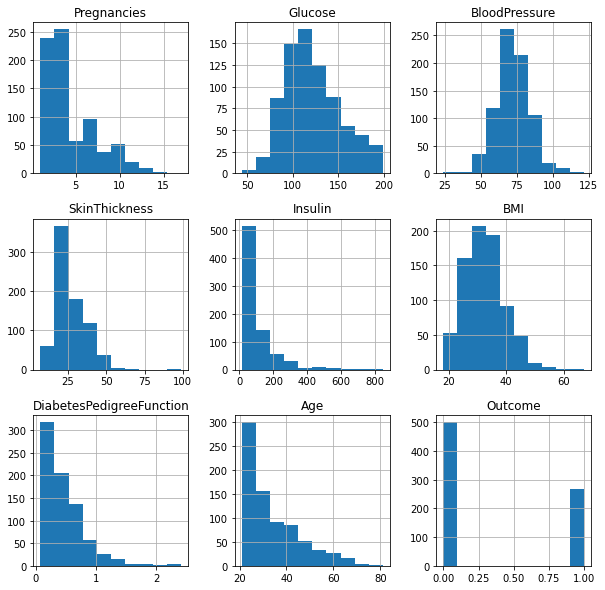

In [13]:
### distrubtion of each variable ###

df_diabetes.hist(figsize = (10,10))

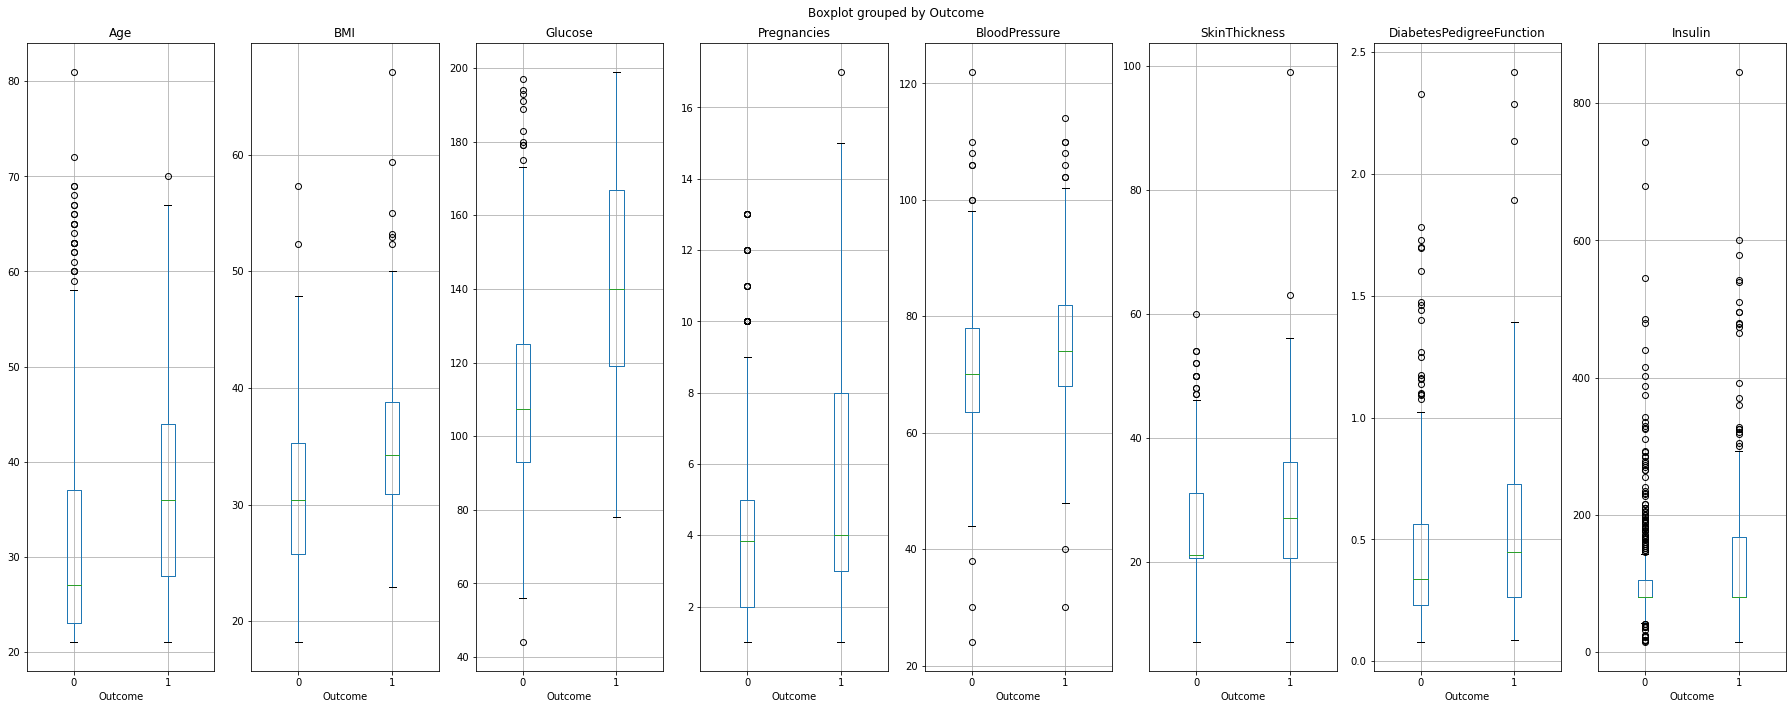

In [14]:
### plotting boxplots the outcome of each individual variable based on outcome ###

fig, axs = plt.subplots(ncols=8, figsize=(25,10))
plt.subplots_adjust(wspace= 5)
df_diabetes.boxplot(column = ['Age'],figsize = (100,100), by = 'Outcome', ax=axs[0])
df_diabetes.boxplot(column = ['BMI'],figsize = (100,100), by = 'Outcome', ax=axs[1])
df_diabetes.boxplot(column = ['Glucose'],figsize = (100,100), by = 'Outcome', ax=axs[2])
df_diabetes.boxplot(column = ['Pregnancies'],figsize = (100,100), by = 'Outcome', ax=axs[3])
df_diabetes.boxplot(column = ['BloodPressure'],figsize = (100,100), by = 'Outcome', ax=axs[4])
df_diabetes.boxplot(column = ['SkinThickness'],figsize = (100,100), by = 'Outcome', ax=axs[5])
df_diabetes.boxplot(column = ['DiabetesPedigreeFunction'], figsize = (100,100), by = 'Outcome', ax=axs[6])
df_diabetes.boxplot(column = ['Insulin'],figsize = (100,100), by = 'Outcome', ax=axs[7])
plt.tight_layout()

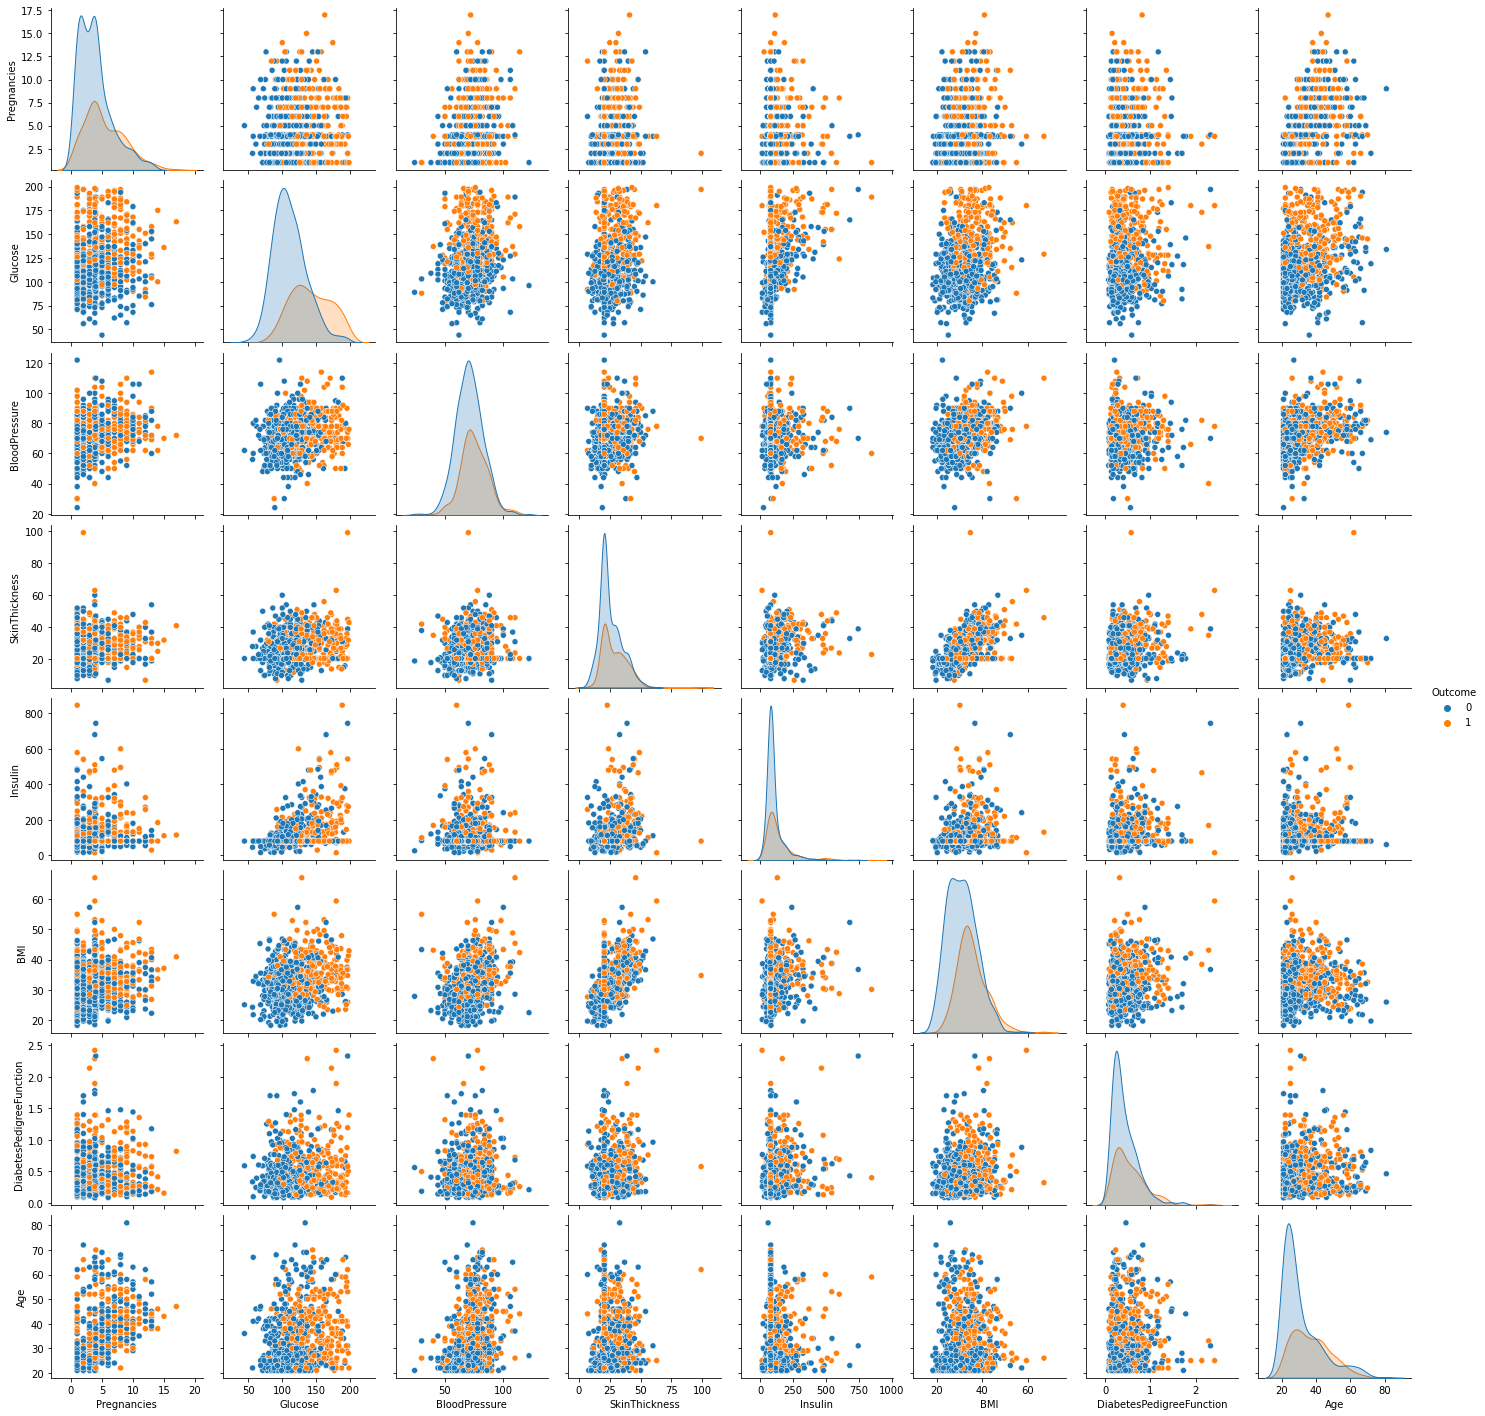

In [15]:
sns.pairplot(data = df_diabetes, hue = 'Outcome')

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 

In [17]:
### correlation ###

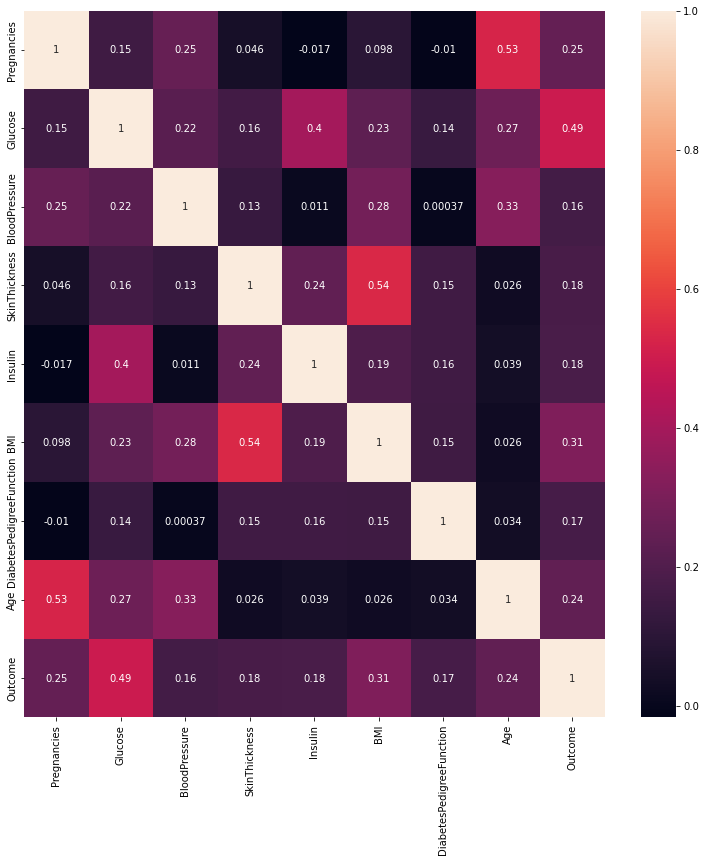

In [18]:
figsns=plt.figure(3,figsize=(13,13))

sns.heatmap(df_diabetes.corr(),annot=True)

plt.show()

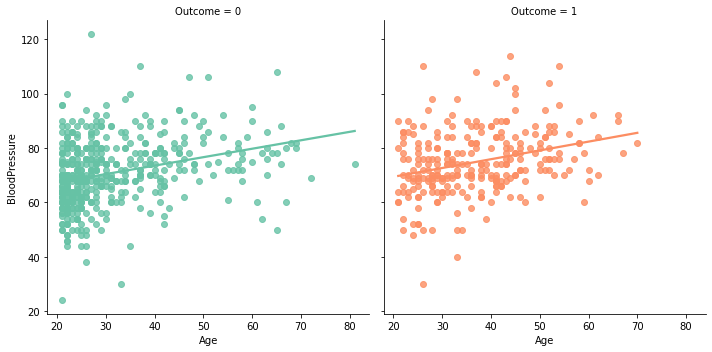

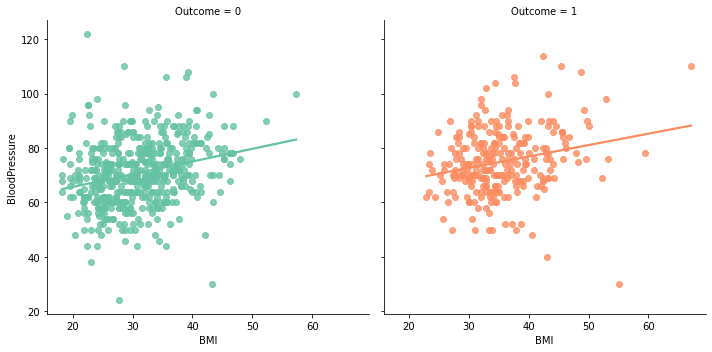

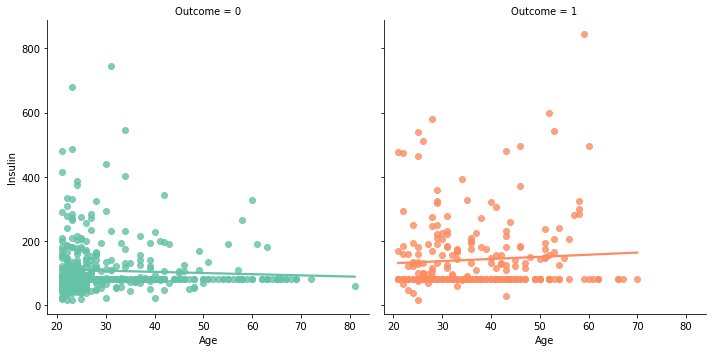

In [19]:
sns.lmplot(x = 'Age', y = 'BloodPressure', 
           data = df_diabetes, col = 'Outcome', hue = 'Outcome', palette="Set2", ci=None);
sns.lmplot(x = 'BMI', y = 'BloodPressure', 
           data = df_diabetes, col = 'Outcome', hue = 'Outcome', palette="Set2", ci=None);
sns.lmplot(x = 'Age', y = 'Insulin', 
           data = df_diabetes, col = 'Outcome', hue = 'Outcome', palette="Set2", ci=None);

In [20]:
### t-test ###
### variables of interest are: Age, Glucose, BMI, Pregnancies ###

In [21]:
tStat, pValue = stats.ttest_ind(df_diabetes['BMI'][df_diabetes['Outcome'] == 1], 
                                df_diabetes['BMI'][df_diabetes['Outcome'] == 0], equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:2.435552459741235e-18 T-Statistic:9.057759892350074


In [22]:
tStat, pValue = stats.ttest_ind(df_diabetes['Age'][df_diabetes['Outcome'] == 1], 
                                df_diabetes['Age'][df_diabetes['Outcome'] == 0], equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:1.2015125273113395e-11 T-Statistic:6.92073837898804


In [23]:
tStat, pValue = stats.ttest_ind(df_diabetes['Pregnancies'][df_diabetes['Outcome'] == 1], 
                                df_diabetes['Pregnancies'][df_diabetes['Outcome'] == 0], equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:5.901577303895363e-11 T-Statistic:6.702974709867232


In [24]:
tStat, pValue = stats.ttest_ind(df_diabetes['Glucose'][df_diabetes['Outcome'] == 1], 
                                df_diabetes['Glucose'][df_diabetes['Outcome'] == 0], equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:3.1635327298140917e-41 T-Statistic:14.86243530828544


In [25]:
tStat, pValue = stats.ttest_ind(df_diabetes['SkinThickness'][df_diabetes['Outcome'] == 1], 
                                df_diabetes['SkinThickness'][df_diabetes['Outcome'] == 0], equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:2.9364155288743967e-06 T-Statistic:4.7304832866433815


In [26]:
tStat, pValue = stats.ttest_ind(df_diabetes['BloodPressure'][df_diabetes['Outcome'] == 1], 
                                df_diabetes['BloodPressure'][df_diabetes['Outcome'] == 0], equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:6.260423710943598e-06 T-Statistic:4.562333602444947


In [27]:
tStat, pValue = stats.ttest_ind(df_diabetes['DiabetesPedigreeFunction'][df_diabetes['Outcome'] == 1], 
                                df_diabetes['DiabetesPedigreeFunction'][df_diabetes['Outcome'] == 0], equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:6.10048142424033e-06 T-Statistic:4.576812008291278


In [28]:
tStat, pValue = stats.ttest_ind(df_diabetes['Insulin'][df_diabetes['Outcome'] == 1], 
                                df_diabetes['Insulin'][df_diabetes['Outcome'] == 0], equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:7.22392066110877e-06 T-Statistic:4.545319274509712


In [29]:
### one way anovas between each significant variable ###

In [30]:
aov_pregnancies = pg.anova(data = df_diabetes, dv = 'Pregnancies', between = 'Outcome', detailed=True)
aov_pregnancies

Source           SS   DF          MS          F         p-unc       np2
0  Outcome   419.991416    1  419.991416  50.186855  3.171370e-12  0.061489
1   Within  6410.312472  766    8.368554        NaN           NaN       NaN

In [31]:
pg.pairwise_tukey(data = df_diabetes, dv = 'Pregnancies', between = 'Outcome', effsize = 'cohen')

A  B   mean(A)   mean(B)      diff        se         T       p-tukey  \
0  0  1  3.859378  5.410866 -1.551488  0.219005 -7.084268  3.029577e-12   

      cohen  
0 -0.536319

In [32]:
aov_glucose = pg.anova(data = df_diabetes, dv = 'Glucose', between = 'Outcome', detailed=True)
aov_glucose

Source             SS   DF             MS           F         p-unc  \
0  Outcome  172624.903137    1  172624.903137  245.833856  2.937418e-48   
1   Within  537886.350890  766     702.201502         NaN           NaN   

        np2  
0  0.242959  
1       NaN

In [33]:
pg.pairwise_tukey(data = df_diabetes, dv = 'Glucose', between = 'Outcome', effsize = 'cohen')

A  B     mean(A)     mean(B)       diff       se         T  p-tukey  \
0  0  1  110.705367  142.159661 -31.454293  2.00613 -15.67909      0.0   

      cohen  
0 -1.186995

In [34]:
aov_bmi = pg.anova(data = df_diabetes, dv = 'BMI', between = 'Outcome', detailed=True)
aov_bmi

Source            SS   DF           MS          F         p-unc       np2
0  Outcome   3535.121507    1  3535.121507  82.755948  7.868368e-19  0.097503
1   Within  32721.552078  766    42.717431        NaN           NaN       NaN

In [35]:
pg.pairwise_tukey(data = df_diabetes, dv = 'BMI', between = 'Outcome', effsize = 'cohen')

A  B    mean(A)    mean(B)      diff        se        T  p-tukey     cohen
0  0  1  30.880066  35.381288 -4.501221  0.494801 -9.09703      0.0 -0.688696

In [36]:
aov_insulin = pg.anova(data = df_diabetes, dv = 'Insulin', between = 'Outcome', detailed=True)
aov_insulin 

Source            SS   DF             MS          F         p-unc  \
0  Outcome  2.133615e+05    1  213361.496162  25.410089  5.788430e-07   
1   Within  6.431890e+06  766    8396.723812        NaN           NaN   

        np2  
0  0.032107  
1       NaN

In [37]:
pg.pairwise_tukey(data = df_diabetes, dv = 'Insulin', between = 'Outcome', effsize = 'cohen')

A  B     mean(A)     mean(B)       diff        se         T       p-tukey  \
0  0  1  106.457354  141.426597 -34.969243  6.937183 -5.040842  5.788428e-07   

     cohen  
0 -0.38162

In [38]:
aov_SkinThickness = pg.anova(data = df_diabetes, dv = 'SkinThickness', between = 'Outcome', detailed=True)
aov_SkinThickness 

Source            SS   DF           MS          F     p-unc       np2
0  Outcome   2179.539495    1  2179.539495  24.207276  0.000001  0.030634
1   Within  68967.992286  766    90.036543        NaN       NaN       NaN

In [39]:
pg.pairwise_tukey(data = df_diabetes, dv = 'SkinThickness', between = 'Outcome', effsize = 'cohen')

A  B    mean(A)    mean(B)      diff        se         T   p-tukey  \
0  0  1  25.373135  28.907494 -3.534358  0.718353 -4.920089  0.000001   

      cohen  
0 -0.372478

In [40]:
aov_Age = pg.anova(data = df_diabetes, dv = 'BloodPressure', between = 'Outcome', detailed=True)
aov_Age 

Source             SS   DF           MS          F     p-unc       np2
0  Outcome    2990.963536    1  2990.963536  20.903727  0.000006  0.026565
1   Within  109601.413909  766   143.082786        NaN       NaN       NaN

In [41]:
pg.pairwise_tukey(data = df_diabetes, dv = 'BloodPressure', between = 'Outcome', effsize = 'cohen')

A  B    mean(A)    mean(B)      diff       se         T   p-tukey     cohen
0  0  1  70.810008  74.950326 -4.140319  0.90557 -4.572059  0.000006 -0.346131

In [42]:
aov_blood = pg.anova(data = df_diabetes, dv = 'DiabetesPedigreeFunction', between = 'Outcome', detailed=True)
aov_blood 

Source         SS   DF        MS        F     p-unc       np2
0  Outcome   2.544679    1  2.544679  23.8713  0.000001  0.030222
1   Within  81.655537  766  0.106600      NaN       NaN       NaN

In [43]:
pg.pairwise_tukey(data = df_diabetes, dv = 'DiabetesPedigreeFunction', between = 'Outcome', effsize = 'cohen')

A  B   mean(A)  mean(B)      diff        se         T   p-tukey     cohen
0  0  1  0.429734   0.5505 -0.120766  0.024718 -4.885826  0.000001 -0.369885

In [44]:
aov_blood = pg.anova(data = df_diabetes, dv = 'BloodPressure', between = 'Outcome', detailed=True)
aov_blood 

Source             SS   DF           MS          F     p-unc       np2
0  Outcome    2990.963536    1  2990.963536  20.903727  0.000006  0.026565
1   Within  109601.413909  766   143.082786        NaN       NaN       NaN

In [45]:
### regression model ### 

In [46]:
x = df_diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']]

y = df_diabetes['Outcome']

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [48]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [49]:
print("Coefficients: \n", regressor.coef_)

Coefficients: 
 [ 0.0192254   0.00671686 -0.00274214 -0.00045824 -0.00020747  0.01582695
  0.00306302]


In [50]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

Coefficient
Pregnancies       0.019225
Glucose           0.006717
BloodPressure    -0.002742
SkinThickness    -0.000458
Insulin          -0.000207
BMI               0.015827
Age               0.003063

In [51]:
y_pred = regressor.predict(x_test)

In [52]:
df_prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_prediction

Actual  Predicted
661       1   0.931012
122       0   0.195410
113       0   0.079528
14        1   0.606660
529       0   0.173017
..      ...        ...
476       1   0.159731
482       0   0.067729
230       1   0.606109
527       0   0.168449
380       0   0.144150

[154 rows x 2 columns]

In [53]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.31216335064374556
Mean Squared Error: 0.14213121275635263
Root Mean Squared Error: 0.37700293467870066


In [54]:
### multilinear regression model: with only variables of interest ###

In [55]:
X2 = df_diabetes[['Pregnancies', 'Glucose', 'Insulin', 'Age']]

y2 = df_diabetes['Outcome']

In [56]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [57]:
regressor2 = LinearRegression()
regressor.fit(X2_train, y2_train)

LinearRegression()

In [58]:
print("Coefficients: \n", regressor.coef_)

Coefficients: 
 [ 2.16156892e-02  7.36142976e-03 -8.07539052e-05  1.43443638e-03]


In [59]:
coeff_df2 = pd.DataFrame(regressor.coef_, X2.columns, columns=['Coefficient'])
coeff_df2

Coefficient
Pregnancies     0.021616
Glucose         0.007361
Insulin        -0.000081
Age             0.001434